**Here I try to explore other HAAR cascades like profile face, profile face alt etc. in order to increase the chances of detecting faces on images.**

# Setting up the path

In [0]:
import os
import shutil

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [0]:
import cv2

In [99]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 2.9MB/s 


In [100]:
from mtcnn import MTCNN

Using TensorFlow backend.


In [0]:
pd.set_option('max_colwidth', -1)

In [4]:
%cd drive/

/content/drive


In [5]:
%cd My\ Drive

/content/drive/My Drive


In [6]:
%cd case\ studies\ 2

/content/drive/My Drive/case studies 2


In [7]:
%cd Final_Face_Dataset/

/content/drive/My Drive/case studies 2/Final_Face_Dataset


In [8]:
%cd training_set/

/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set


In [9]:
%cd ..

/content/drive/My Drive/case studies 2/Final_Face_Dataset


**Extracting the HAAR files from [here](http://alereimondo.no-ip.org/OpenCV/34).**

In [10]:
!sudo wget http://alereimondo.no-ip.org/OpenCV/uploads/34/frontalFace10.zip

--2020-03-06 02:06:52--  http://alereimondo.no-ip.org/OpenCV/uploads/34/frontalFace10.zip
Resolving alereimondo.no-ip.org (alereimondo.no-ip.org)... 181.167.159.144
Connecting to alereimondo.no-ip.org (alereimondo.no-ip.org)|181.167.159.144|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 763850 (746K) [application/zip]
Saving to: ‘frontalFace10.zip’

frontalFace10.zip   100%[===================>] 745.95K   316KB/s    in 2.4s    

2020-03-06 02:06:55 (316 KB/s) - ‘frontalFace10.zip’ saved [763850/763850]



In [11]:
!ls

 final_test_data.csv				      HAAR_features_test
 final_training_data.csv			      pending_training_HAAR
 frontalFace10.zip				     'Retesting HAAR.ipynb'
'HAAR Feature Extraction for Test Images.ipynb'       testing_set
'HAAR Feature Extraction for Training Images.ipynb'   training_set
 HAAR_features					      Untitled0.ipynb


In [12]:
!unzip frontalFace10.zip

Archive:  frontalFace10.zip
  inflating: haarcascade_frontalface_alt_tree.xml  
  inflating: haarcascade_frontalface_alt.xml  
  inflating: haarcascade_frontalface_alt2.xml  
  inflating: haarcascade_frontalface_default.xml  


In [13]:
!sudo wget http://alereimondo.no-ip.org/OpenCV/uploads/34/profileFace10.zip

--2020-03-06 02:08:22--  http://alereimondo.no-ip.org/OpenCV/uploads/34/profileFace10.zip
Resolving alereimondo.no-ip.org (alereimondo.no-ip.org)... 181.167.159.144
Connecting to alereimondo.no-ip.org (alereimondo.no-ip.org)|181.167.159.144|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133371 (130K) [application/zip]
Saving to: ‘profileFace10.zip’

profileFace10.zip   100%[===================>] 130.25K   223KB/s    in 0.6s    

2020-03-06 02:08:23 (223 KB/s) - ‘profileFace10.zip’ saved [133371/133371]



In [14]:
!unzip profileFace10.zip

Archive:  profileFace10.zip
  inflating: haarcascade_profileface.xml  


In [0]:
os.mkdir('HAAR files')

In [16]:
%cd HAAR\ files

/content/drive/My Drive/case studies 2/Final_Face_Dataset/HAAR files


In [0]:
destination = os.getcwd()

In [18]:
%cd ..

/content/drive/My Drive/case studies 2/Final_Face_Dataset


In [0]:
source = os.getcwd()

In [20]:
shutil.move(os.path.join(source, 'haarcascade_profileface.xml'), os.path.join(destination, 'haarcascade_profileface.xml'))
shutil.move(os.path.join(source, 'haarcascade_frontalface_alt_tree.xml'), os.path.join(destination, 'haarcascade_frontalface_alt_tree.xml'))
shutil.move(os.path.join(source, 'haarcascade_frontalface_alt.xml'), os.path.join(destination, 'haarcascade_frontalface_alt.xml.xml'))
shutil.move(os.path.join(source, 'haarcascade_frontalface_alt2.xml'), os.path.join(destination, 'haarcascade_frontalface_alt2.xml'))
shutil.move(os.path.join(source, 'haarcascade_frontalface_default.xml'), os.path.join(destination, 'haarcascade_frontalface_default.xml'))

'/content/drive/My Drive/case studies 2/Final_Face_Dataset/HAAR files/haarcascade_frontalface_default.xml'

**Defining the cascades**

In [76]:
!pwd

/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set


In [88]:
%cd ..

/content/drive/My Drive/case studies 2/Final_Face_Dataset


In [89]:
%cd HAAR\ files

/content/drive/My Drive/case studies 2/Final_Face_Dataset/HAAR files


In [90]:
!ls

haarcascade_frontalface_alt2.xml      haarcascade_frontalface_default.xml
haarcascade_frontalface_alt_tree.xml  haarcascade_profileface.xml
haarcascade_frontalface_alt.xml.xml


In [0]:
profile_face = cv2.CascadeClassifier(os.path.join(os.getcwd(), 'haarcascade_profileface.xml'))
frontal_face = cv2.CascadeClassifier(os.path.join(os.getcwd(), 'haarcascade_frontalface_default.xml'))
tilted_face = cv2.CascadeClassifier(os.path.join(os.getcwd(), 'haarcascade_frontalface_alt2.xml'))
tilted_face_2 = cv2.CascadeClassifier(os.path.join(os.getcwd(), 'haarcascade_frontalface_alt_tree.xml'))
frontal_face_2 = cv2.CascadeClassifier(os.path.join(os.getcwd(), 'haarcascade_frontalface_alt.xml.xml'))

# Some more HAAR experiments

In [92]:
%cd ..

/content/drive/My Drive/case studies 2/Final_Face_Dataset


In [27]:
!ls

 final_test_data.csv				     'HAAR files'
 final_training_data.csv			      pending_training_HAAR
 frontalFace10.zip				      profileFace10.zip
'HAAR Feature Extraction for Test Images.ipynb'      'Retesting HAAR.ipynb'
'HAAR Feature Extraction for Training Images.ipynb'   testing_set
 HAAR_features					      training_set
 HAAR_features_test				      Untitled0.ipynb


In [28]:
training_df = pd.read_csv('final_training_data.csv')
training_df.head()

,Unnamed: 0,images,labels,label_count
0,23506,Yoriko_Kawaguchi - _0_1828.jpg,Yoriko_Kawaguchi,252
1,18146,Yoriko_Kawaguchi - _0_731.jpg,Yoriko_Kawaguchi,252
2,18157,Yoriko_Kawaguchi - _0_4306.jpg,Yoriko_Kawaguchi,252
3,18156,Yoriko_Kawaguchi - _0_7914.jpg,Yoriko_Kawaguchi,252
4,18155,Yoriko_Kawaguchi - _0_7951.jpg,Yoriko_Kawaguchi,252


In [93]:
%cd training_set/

/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set


In [30]:
len(training_df)

42500

In [0]:
img = cv2.imread('Yoriko_Kawaguchi - _0_1828.jpg')

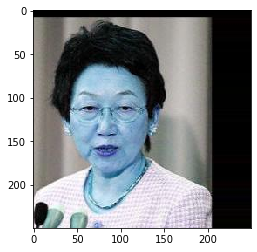

In [32]:
plt.imshow(img)

In [0]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

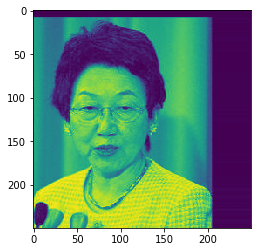

In [34]:
plt.imshow(gray)

In [0]:
face = profile_face.detectMultiScale(gray, 1.3, 5)

In [36]:
face

array([[ 50,  69, 107, 107]], dtype=int32)

In [0]:
face2 = frontal_face.detectMultiScale(gray, 1.3, 5)

In [39]:
len(face2)

1

In [0]:
faces_found = []
face_bbox = []
image = []

for i in range(100):
  try:
    img = cv2.imread(training_df['images'][i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    frontal_faces = frontal_face.detectMultiScale(gray, 1.3, 5)
    if len(frontal_faces)>0:
      faces_found.append(len(frontal_faces))
      face_bbox.append(frontal_faces)
      image.append(training_df['images'][i])
    else:
      profile_faces = profile_face.detectMultiScale(gray, 1.3, 5)
      if len(profile_faces)>0:
        faces_found.append(len(profile_faces))
        face_bbox.append(profile_faces)
        image.append(training_df['images'][i])
      else:
        tilted_faces = tilted_face.detectMultiScale(gray, 1.3, 5)
        if len(tilted_faces) > 0:
          faces_found.append(len(tilted_faces))
          face_bbox.append(tilted_faces)
          image.append(training_df['images'][i])
        else:
          tilted_faces_2 = tilted_face_2.detectMultiScale(gray, 1)


          faces_found.append('None')
          face_bbox.append('None')
          image.append(training_df['images'][i])
    if len(image)%10 == 0:
      print(len(image))
  except Exception as e:
    faces_found.append('Error in image')
    face_bbox.append('Error in image')
    image.append(training_df['images'][i])



In [62]:
!pwd

/content/drive/My Drive/case studies 2/Final_Face_Dataset/HAAR files


In [63]:
%cd ..

/content/drive/My Drive/case studies 2/Final_Face_Dataset


In [64]:
%cd training_set/

/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set


In [94]:
faces_found = []
face_bbox = []
image = []

for i in range(100):
  try:
    img = cv2.imread(training_df['images'][i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    frontal_faces = frontal_face.detectMultiScale(gray)
    if len(frontal_faces)>0:
      faces_found.append(len(frontal_faces))
      face_bbox.append(frontal_faces)
      image.append(training_df['images'][i])
    else:
      profile_faces = profile_face.detectMultiScale(gray)
      if len(profile_faces)>0:
        faces_found.append(len(profile_faces))
        face_bbox.append(profile_faces)
        image.append(training_df['images'][i])
      else:
        tilted_faces = tilted_face.detectMultiScale(gray)
        if len(tilted_faces)>0:
          faces_found.append(len(tilted_faces))
          face_bbox.append(tilted_faces)
          image.append(training_df['images'][i])
        else:
          tilted_faces_2 = tilted_face_2.detectMultiScale(gray)
          if len(tilted_faces_2)>0:
            faces_found.append(len(tilted_faces_2))
            face_bbox.append(tilted_faces_2)
            image.append(training_df['images'][i])
          else:
            frontal_faces_2 = frontal_face_2.detectMultiScale(gray)
            if len(frontal_faces_2) > 0:
              faces_found.append(len(frontal_faces_2))
              face_bbox.append(frontal_faces_2)
              image.append(training_df['images'][i])

            else:
              faces_found.append('None')
              face_bbox.append('None')
              image.append(training_df['images'][i])

    if len(image)%10 == 0:
      print(len(image))
  except Exception as e:
    faces_found.append('Error')
    face_bbox.append('Error')
    image.append(training_df['image'][i])

10
20
30
40
50
60
70
80
90
100


In [95]:
df = pd.DataFrame(columns = ['image', 'faces_found', 'face_bbox'])
df['image'] = image
df['faces_found'] = faces_found
df['face_bbox'] = face_bbox
df.head()

,image,faces_found,face_bbox
0,Yoriko_Kawaguchi - _0_1828.jpg,1,"[[28, 69, 113, 113]]"
1,Yoriko_Kawaguchi - _0_731.jpg,1,"[[70, 68, 111, 111]]"
2,Yoriko_Kawaguchi - _0_4306.jpg,1,"[[66, 66, 116, 116]]"
3,Yoriko_Kawaguchi - _0_7914.jpg,2,"[[203, 72, 45, 45], [67, 69, 114, 114]]"
4,Yoriko_Kawaguchi - _0_7951.jpg,2,"[[203, 72, 46, 46], [67, 69, 114, 114]]"


In [96]:
df['faces_found'].unique()

array([1, 2, 'None'], dtype=object)

In [97]:
df.loc[df['faces_found'] == 'None']

,image,faces_found,face_bbox
63,Yoriko_Kawaguchi - _0_7105.jpg,None,None
66,Yoriko_Kawaguchi - _0_1156.jpg,None,None
68,Yoriko_Kawaguchi - _0_4876.jpg,None,None
69,Yoriko_Kawaguchi - _0_9068.jpg,None,None
71,Yoriko_Kawaguchi - _0_7125.jpg,None,None
73,Yoriko_Kawaguchi - _0_159.jpg,None,None


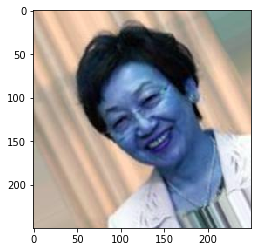

In [87]:
plt.imshow(cv2.imread('Yoriko_Kawaguchi - _0_7105.jpg'))

In [0]:
frontal_faces_found = []
frontal_face_bbox = []
profile_faces_found = []
profile_face_bbox = []
tilted_faces_found = []
tilted_face_bbox = []
image = []

for i in range(100):
  try:
    img = cv2.imread(training_df['images'][i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    frontal_faces = frontal_face.detectMultiScale(gray, 1.3, 5)
    frontal_faces_found.append(len(frontal_faces))
    


  except Exception as e:
    pass



In [61]:
frontal_faces_found

[]

In [0]:
for i in range(100):
  try:
    img = cv2.imread(training_df['images'][i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    frontal_faces = frontal_face.detectMultiScale(gray, 1.3, 5)
  except Exception as e:
    pass

In [51]:
df = pd.DataFrame(columns = ['image', 'faces_found', 'face_bbox'])
df['image'] = image
df['faces_found'] = faces_found
df['face_bbox'] = face_bbox
df.head()

,image,faces_found,face_bbox
0,Yoriko_Kawaguchi - _0_1828.jpg,Error in image,Error in image
1,Yoriko_Kawaguchi - _0_731.jpg,Error in image,Error in image
2,Yoriko_Kawaguchi - _0_4306.jpg,Error in image,Error in image
3,Yoriko_Kawaguchi - _0_7914.jpg,Error in image,Error in image
4,Yoriko_Kawaguchi - _0_7951.jpg,Error in image,Error in image


In [52]:
df['faces_found'].unique()

array(['Error in image'], dtype=object)

In [43]:
df.loc[df['faces_found'] == 'None']

,image,faces_found,face_bbox
61,Yoriko_Kawaguchi - _0_2027.jpg,None,None
62,Yoriko_Kawaguchi - _0_2504.jpg,None,None
63,Yoriko_Kawaguchi - _0_7105.jpg,None,None
66,Yoriko_Kawaguchi - _0_1156.jpg,None,None
68,Yoriko_Kawaguchi - _0_4876.jpg,None,None
69,Yoriko_Kawaguchi - _0_9068.jpg,None,None
71,Yoriko_Kawaguchi - _0_7125.jpg,None,None
73,Yoriko_Kawaguchi - _0_159.jpg,None,None


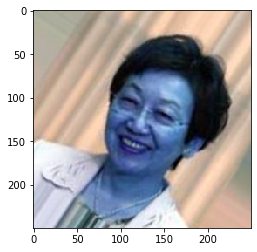

In [44]:
plt.imshow(cv2.imread('Yoriko_Kawaguchi - _0_2027.jpg'))

In [0]:
img = cv2.imread('Yoriko_Kawaguchi - _0_7914.jpg')

In [0]:
detector = MTCNN()

In [111]:
len(detector.detect_faces(img))

2

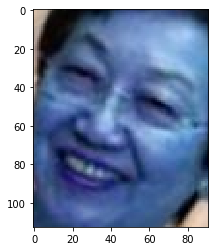

In [104]:
plt.imshow(img[71:(71+113), 86:(86+91)])

In [105]:
df.head()

,image,faces_found,face_bbox
0,Yoriko_Kawaguchi - _0_1828.jpg,1,"[[28, 69, 113, 113]]"
1,Yoriko_Kawaguchi - _0_731.jpg,1,"[[70, 68, 111, 111]]"
2,Yoriko_Kawaguchi - _0_4306.jpg,1,"[[66, 66, 116, 116]]"
3,Yoriko_Kawaguchi - _0_7914.jpg,2,"[[203, 72, 45, 45], [67, 69, 114, 114]]"
4,Yoriko_Kawaguchi - _0_7951.jpg,2,"[[203, 72, 46, 46], [67, 69, 114, 114]]"


In [106]:
!pwd

/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set


In [0]:
image = []
bounding_boxes = []
number_of_faces = []

for i in range(500):
  img = cv2.imread(training_df['images'][i])
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  faces = detector.detect_faces(gray)
  image.append(training_df['images'][i])
  bounding_boxes.append(faces)
  number_of_faces.append(len(faces))

In [142]:
df = pd.DataFrame(columns = ['image', 'bounding_boxes', 'number_of_faces'])
df['image'] = image
df['bounding_boxes'] = bounding_boxes
df['number_of_faces'] = number_of_faces
df.head()

,image,bounding_boxes,number_of_faces
0,Yoriko_Kawaguchi - _0_1828.jpg,"[{'box': [41, 62, 89, 122], 'confidence': 0.9981860518455505, 'keypoints': {'left_eye': (65, 113), 'right_eye': (105, 112), 'nose': (83, 138), 'mouth_left': (70, 159), 'mouth_right': (100, 158)}}]",1
1,Yoriko_Kawaguchi - _0_731.jpg,"[{'box': [73, 62, 94, 122], 'confidence': 0.999994158744812, 'keypoints': {'left_eye': (104, 114), 'right_eye': (143, 108), 'nose': (128, 135), 'mouth_left': (106, 153), 'mouth_right': (148, 147)}}]",1
2,Yoriko_Kawaguchi - _0_4306.jpg,"[{'box': [71, 63, 91, 120], 'confidence': 0.9999990463256836, 'keypoints': {'left_eye': (106, 108), 'right_eye': (146, 115), 'nose': (125, 138), 'mouth_left': (97, 147), 'mouth_right': (138, 154)}}]",1
3,Yoriko_Kawaguchi - _0_7914.jpg,"[{'box': [77, 64, 88, 120], 'confidence': 0.9997695088386536, 'keypoints': {'left_eye': (105, 112), 'right_eye': (147, 111), 'nose': (129, 134), 'mouth_left': (105, 153), 'mouth_right': (147, 151)}}, {'box': [209, 72, 33, 44], 'confidence': 0.9991115927696228, 'keypoints': {'left_eye': (220, 89), 'right_eye': (236, 89), 'nose': (229, 98), 'mouth_left': (220, 106), 'mouth_right': (235, 106)}}]",2
4,Yoriko_Kawaguchi - _0_7951.jpg,"[{'box': [77, 63, 87, 120], 'confidence': 0.9997085928916931, 'keypoints': {'left_eye': (105, 112), 'right_eye': (147, 111), 'nose': (129, 134), 'mouth_left': (106, 153), 'mouth_right': (147, 151)}}, {'box': [208, 72, 34, 45], 'confidence': 0.9989809393882751, 'keypoints': {'left_eye': (219, 89), 'right_eye': (236, 89), 'nose': (229, 98), 'mouth_left': (220, 106), 'mouth_right': (235, 107)}}]",2


In [143]:
df['number_of_faces'].unique()

array([1, 2, 3, 4])

In [131]:
df.loc[df['number_of_faces'] == 0]

,image,bounding_boxes,number_of_faces


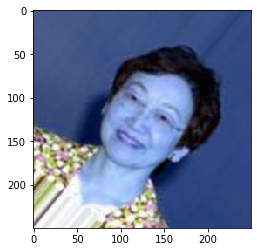

In [124]:
plt.imshow(cv2.imread('Yoriko_Kawaguchi - _0_7125.jpg'))

# Final observations

After a lot of trial and error, HAAR cascades still fail to detect tilted faces. After a lot of research, I chanced upon MTCNN Face Detection in this [blog](https://towardsdatascience.com/whats-the-difference-between-haar-feature-classifiers-and-convolutional-neural-networks-ce6828343aeb). 


1.   HAAR cascades fail to detect tilted faces
2.   MTCNN does a better job at detecting faces across varied angles
3.   MTCNN does not seem to read grayscale images(need to verify)
4.   But MTCNN does a brilliant job for RGB images as compared to BGR images.

Hence I have decided to proceed with face detection using MTCNN.


